<a href="https://colab.research.google.com/github/msjun23/Deep-Learning-from-Scratch/blob/main/Chapter3/perceptron_and_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#퍼셉트론
- 복잡한 함수도 표현 가능(다층 퍼셉트론)
- 가중치 설정(원하는 결과를 출력하기 위해)하는 작업을 수동으로 해야함

#**신경망**
- 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습

1. 이번 장에서는 신경망의 개요를 설명
2. 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정 설명

신경망

입력층 -> 은닉층 -> 출력층

입력층부터 0층 시작, 출력층은 카운트 안함. 실제로 가중치를 갖는 층의 개수는 입력층, 은닉층, 출력층의 합계에서 1을 뺀 값.

- 입력 $x_1, x_2$
- 가중치 $w_1, w_2$
- 편향 $b$
- 출력 $y$

위의 요소로 구성되는 퍼셉트론에서 조건 분기의 동작을 하나의 함수인 $h(x)$로 나타내면 아래와 같다.

$y=h(b+w_1x_1+w_2x_2)\\
h(x)=\left\{\begin{matrix}
0\;\;(x\leq 0)\\ 
1\;\;(x> 0)
\end{matrix}\right.$


#활성화 함수

위와 같이 입력 신호의 총합을 출력 신호로 변환한는 함수를 일반적으로 **활성화 함수**라고 한다. 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할을 한다.

$a=b+w_1x_1+w_2x_2\\
y=h(a)$

가중치가 달린 입력신호와 편향의 총합을 $a$라고 하고, 이를 함수 $h()$의 입력으로 사용해 $y$를 출력한다.

In [1]:
# 계단 함수 구현하기
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

# 이 구현은 단순하지만, 인수 x는 실수(부동소수점)만 받아들인다.
# 넘파일 배열이 가능하도록 수정한다.

In [2]:
# 넘파이 배열을 입력으로 사용하는 계단 함수 구현하기
def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [3]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0   # array([Fasle, True, Ture], dtype=bool)
print(y)

y = y.astype(np.int)    # astype 함수를 이용해 배열 y의 원소를 bool에서 int형으로 변환
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


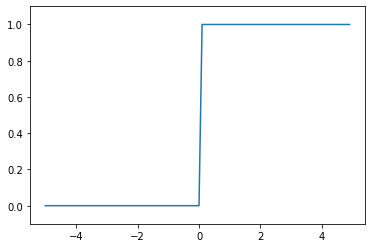

In [4]:
# 앞서 정의한 계단 함수를 matplotlib 라이브러리를 이요해 그림
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)    # -5.0부터 5.0까지 0.1 간격으로 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축 범위 지정
plt.show()

In [5]:
# sigmoid 함수 구현하기
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [6]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


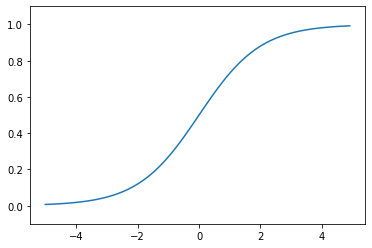

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)   # y축 범위 지정
plt.show()

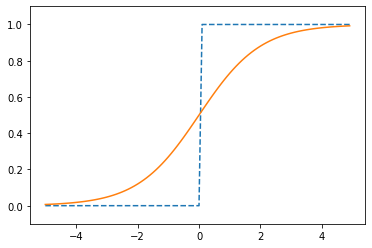

In [8]:
# 계단 함수와 sigmoid 함수 비교
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, linestyle = '--')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)   # y축 범위 지정
plt.show()

# 비선형 함수

계단 함수과 sigmoid 함수 모두 비선형 함수이다.

신경망에서는 활성화 함수로 **비선형 함수**만을 사용해야 한다.

#ReLU 함수

최근에는 **ReLU**(Rectified Linear Unit)함수를 신경망에서 주로 사용한다. ReLU함수는 입력이 0을 넘으면 입력을 그대로 출력하고, 0이하이면 0을 출력한다. 수식으로는 다음과 같이 쓸 수 있다.

$h(x)=\left\{\begin{matrix}
x\;\;(x> 0)\\ 
0\;\;(x\leq 0)
\end{matrix}\right.$

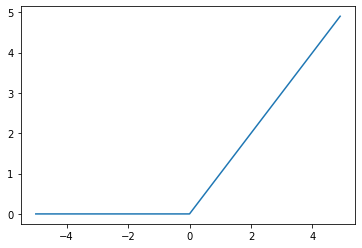

In [9]:
#ReLU 함수 구현하기
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()
